<H1> Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

<H1> Import Initial Compiled Dataset

In [2]:
mortgage_dataset =  pd.read_csv('.\Data\compiled_dataset_v.1.csv')
mortgage_dataset.head(10)

,record_date,mortgage_rate,consumer_goods_production,cpi,household_net_worth,industrial_production,rates_3months,job_openings,money_supply,money_velocity,3monthForecast,6monthForecast,12monthForecast
0,2001-01,7.0325,103.0259,175.6,41994416,91.8903,5.62,5234,4981.02,2.085,7.0775,7.1275,6.9975
1,2001-04,7.0775,102.6877,176.4,43198401,90.7293,4.53,4615,5167.06,2.059,7.1275,6.6175,6.9850
2,2001-07,7.1275,102.2020,177.4,42164052,89.2260,3.66,4447,5182.80,2.014,6.6175,6.9975,6.4850
3,2001-10,6.6175,102.4001,177.6,43746475,88.3926,2.31,3707,5316.20,1.980,6.9975,6.9850,6.1125
4,2002-01,6.9975,103.8754,177.7,44391512,88.4665,1.74,3699,5455.30,1.969,6.9850,6.4850,5.9160
5,2002-04,6.9850,103.9730,179.3,43759840,89.5532,1.87,3471,5533.78,1.972,6.4850,6.1125,5.8125
6,2002-07,6.4850,105.4834,180.0,42660310,90.6455,1.79,3367,5569.50,1.953,6.1125,5.9160,5.6325
7,2002-10,6.1125,104.7528,181.2,43550562,90.4041,1.73,3479,5684.40,1.927,5.9160,5.8125,5.9520
8,2003-01,5.9160,105.8743,182.6,43717715,91.1355,1.29,3441,5800.70,1.915,5.8125,5.6325,5.7125
9,2003-04,5.8125,105.4597,183.2,45531292,90.4281,1.24,3108,5940.10,1.901,5.6325,5.9520,5.8300


In [3]:
mortgage_dataset.describe()

,mortgage_rate,consumer_goods_production,cpi,household_net_worth,industrial_production,rates_3months,job_openings,money_supply,money_velocity,3monthForecast,6monthForecast,12monthForecast
count,90.000000,90.000000,90.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,88.000000
mean,4.906856,102.259030,226.564667,7.846491e+07,97.042669,1.712889,5237.977778,10953.711111,1.651978,4.904717,4.909744,4.865136
std,1.240851,4.505055,31.795469,2.901968e+07,5.035880,1.724431,2304.727126,4827.121495,0.280906,1.237306,1.247115,1.224329
min,2.735000,84.223400,175.600000,4.199442e+07,84.597900,0.000000,2232.000000,4981.020000,1.128000,2.735000,2.735000,2.735000
25%,3.898750,99.350050,202.150000,5.835802e+07,93.030800,0.240000,3701.000000,6890.642500,1.458500,3.898750,3.898750,3.889375
50%,4.782500,101.274900,228.215000,6.610072e+07,98.704550,1.070000,4578.500000,9858.130000,1.636500,4.782500,4.782500,4.659500
75%,6.030000,105.336100,246.032500,9.686809e+07,101.209300,2.567500,6201.250000,13705.421250,1.940000,6.030000,6.030000,5.926125
max,7.127500,111.475100,302.920000,1.459548e+08,103.939700,5.620000,11755.000000,21905.875000,2.085000,7.127500,7.530000,7.530000


In [4]:
mortgage_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   record_date                90 non-null     object 
 1   mortgage_rate              90 non-null     float64
 2   consumer_goods_production  90 non-null     float64
 3   cpi                        90 non-null     float64
 4   household_net_worth        90 non-null     int64  
 5   industrial_production      90 non-null     float64
 6   rates_3months              90 non-null     float64
 7   job_openings               90 non-null     int64  
 8   money_supply               90 non-null     float64
 9   money_velocity             90 non-null     float64
 10  3monthForecast             90 non-null     float64
 11  6monthForecast             90 non-null     float64
 12  12monthForecast            88 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 9.

<h1> Visualization

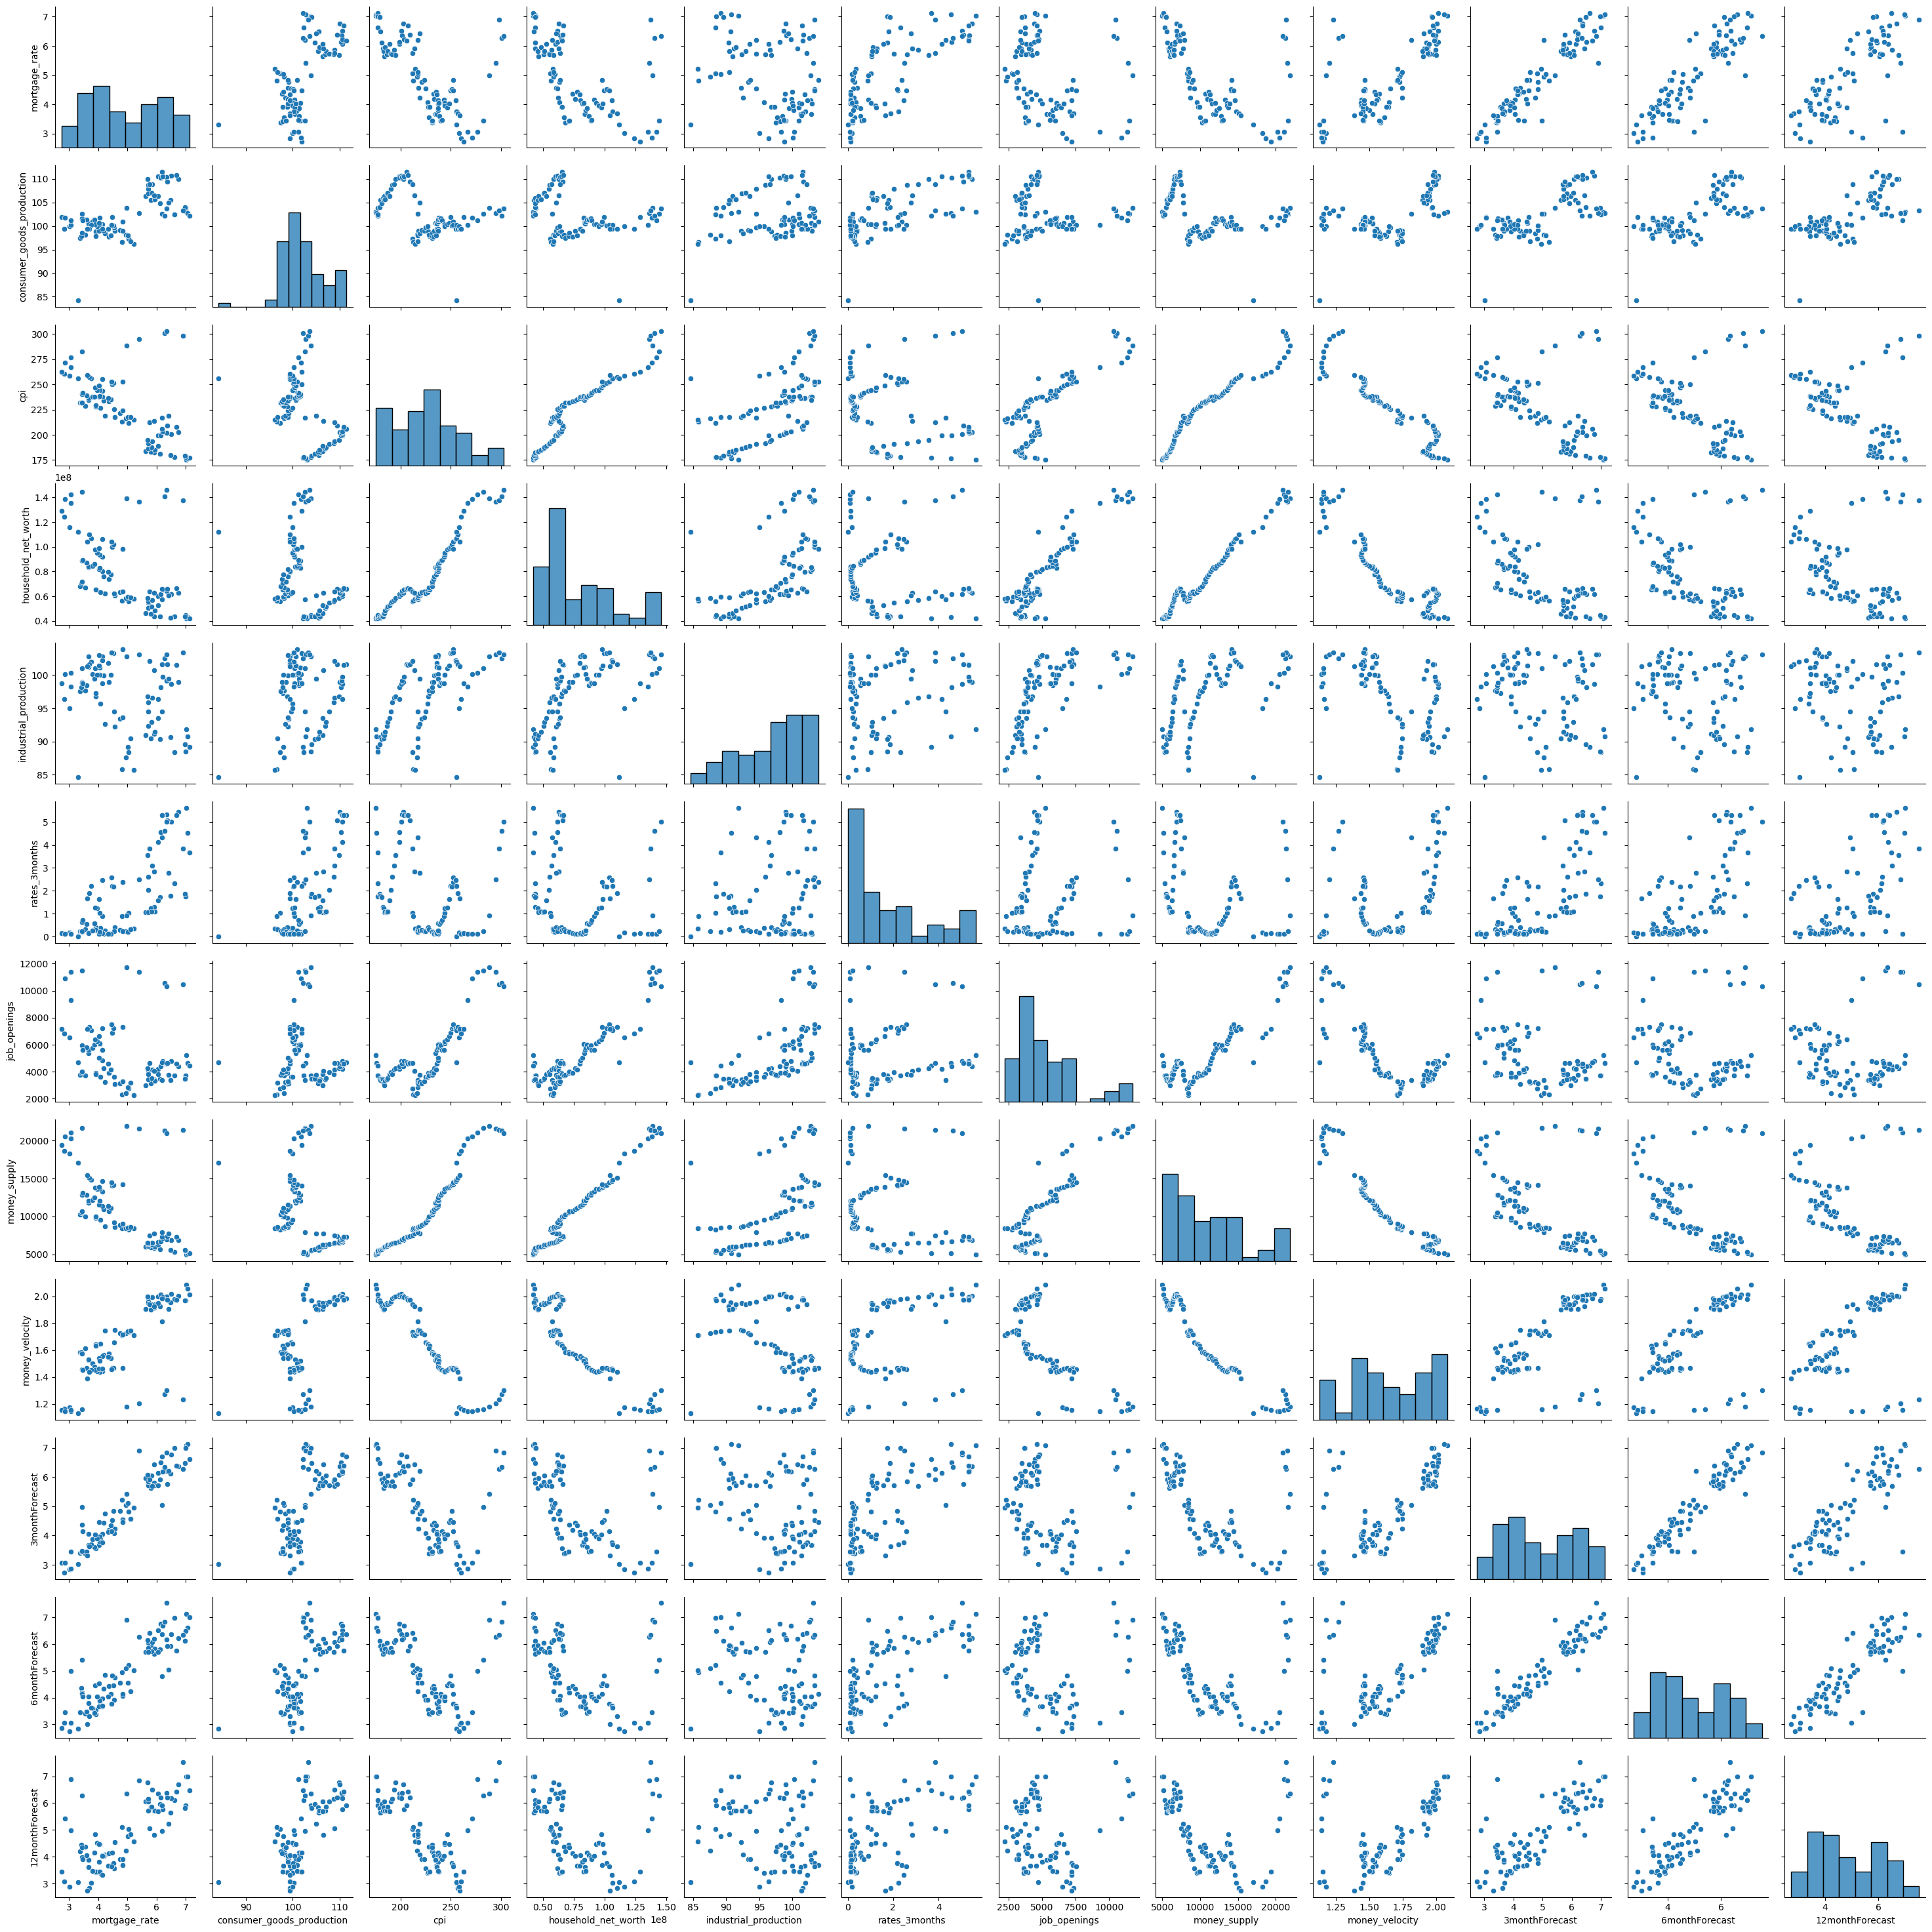

In [5]:
sns.pairplot(mortgage_dataset)

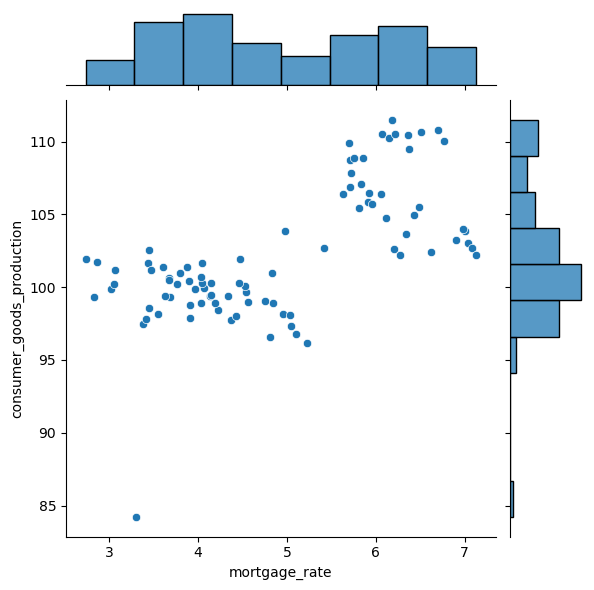

In [6]:
sns.jointplot(x='mortgage_rate', y = 'consumer_goods_production', data = mortgage_dataset)

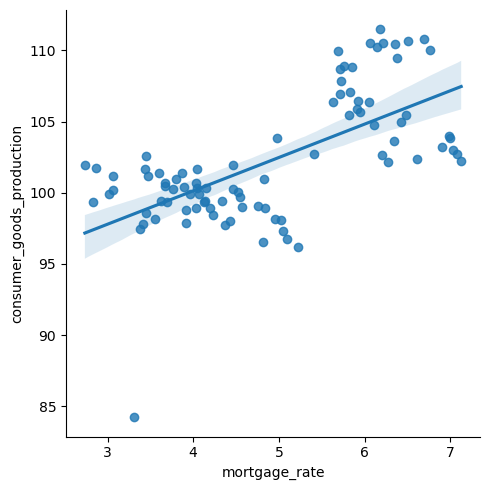

In [7]:
sns.lmplot(x='mortgage_rate', y = 'consumer_goods_production', data = mortgage_dataset)

<h1> Create Training & Test Sets

In [8]:
forecast_dataset_12m = mortgage_dataset.dropna() #drop na rows for 12 month forecasting

X = mortgage_dataset.drop(['record_date','mortgage_rate','3monthForecast', '6monthForecast', '12monthForecast'], axis = 1)
X2 = mortgage_dataset.drop(['record_date','3monthForecast', '6monthForecast', '12monthForecast'], axis = 1)
X_m12 = forecast_dataset_12m.drop(['record_date','mortgage_rate','3monthForecast', '6monthForecast', '12monthForecast'], axis = 1)
y_m3 = mortgage_dataset['3monthForecast']
y_m6 =  mortgage_dataset['6monthForecast']
y_m12 = forecast_dataset_12m['12monthForecast']
X_train_m3, X_test_m3, y_train_m3, y_test_m3 = train_test_split(X, y_m3, test_size = 0.2, random_state=2023)
X_train_m3_v2, X_test_m3_v2, y_train_m3_v2, y_test_m3_v2 = train_test_split(X2, y_m3, test_size = 0.2, random_state=2023)
X_train_m6, X_test_m6, y_train_m6, y_test_m6 = train_test_split(X, y_m6, test_size = 0.2, random_state=2023)
X_train_m12, X_test_m12, y_train_m12, y_test_m12 = train_test_split(X_m12, y_m12, test_size = 0.2, random_state=2023)

<h1> Training the Models

In [9]:
#Train 3 month forecast
regressor_m3 = LinearRegression(fit_intercept = True)
regressor_m3.fit(X_train_m3, y_train_m3)

#Train 6 month forecast
regressor_m6 = LinearRegression(fit_intercept = True)
regressor_m6.fit(X_train_m6, y_train_m6)

#Train 12 month forecast
regressor_m12 = LinearRegression(fit_intercept = True)
regressor_m12.fit(X_train_m12, y_train_m12)

#Train alternative 3 month forecast model with current mortgage rate as a predictor
regressor_m3_v2 = LinearRegression(fit_intercept = True)
regressor_m3_v2.fit(X_train_m3_v2, y_train_m3_v2)

LinearRegression()

<h1> Test the Models

In [10]:
#Test 3 month forecast
y_predict_m3 = regressor_m3.predict(X_test_m3)

#Test 6 month forecast
y_predict_m6 = regressor_m6.predict(X_test_m6)

#Test 12 month forecast
y_predict_m12 = regressor_m12.predict(X_test_m12)

#Test alternative 3 month forecast model with current mortgage rate as a predictor
y_predict_m3_v2 = regressor_m3_v2.predict(X_test_m3_v2)

<h1> Evaluating 3 Month Regression Forecast

RSME =  0.575
MSE =  0.3303558042007601
MAE =  0.4962564686148752
R2 =  0.8189825809643608


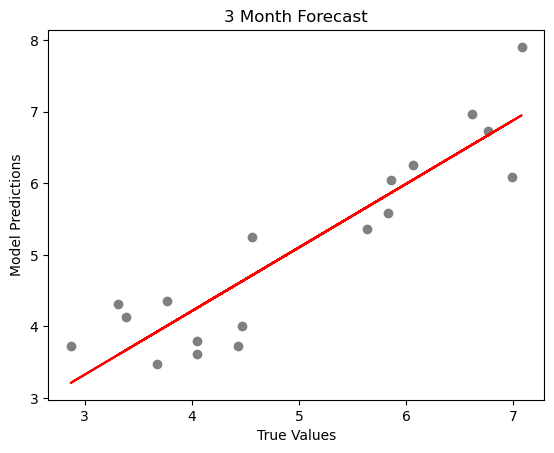

In [11]:
slope_m3, intercept_m3 = np.polyfit(y_test_m3, y_predict_m3, 1)
plt.scatter(y_test_m3, y_predict_m3, color = 'gray')
plt.plot(y_test_m3, slope_m3 * y_test_m3 + intercept_m3, color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('3 Month Forecast')

RMSE_m3 = float(format(np.sqrt(mean_squared_error(y_test_m3, y_predict_m3)), '.3f'))
MSE_m3 = mean_squared_error(y_test_m3, y_predict_m3)
MAE_m3 = mean_absolute_error(y_test_m3, y_predict_m3)
r2_m3 = r2_score(y_test_m3, y_predict_m3)
print('RSME = ', RMSE_m3)
print('MSE = ', MSE_m3)
print('MAE = ', MAE_m3)
print('R2 = ', r2_m3)

<h1> Evaluating 3 Month Regression Forecast With Mortgage Rate Predictor

RSME =  0.352
MSE =  0.12415897735947018
MAE =  0.284311447921926
R2 =  0.9319674806801413


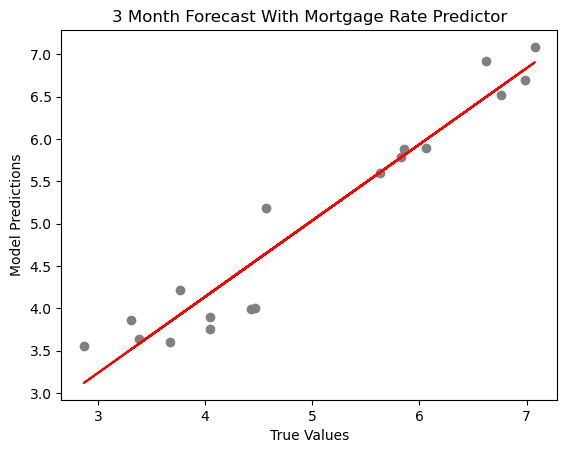

In [12]:
slope_m3_v2, intercept_m3_v2 = np.polyfit(y_test_m3_v2, y_predict_m3_v2, 1)
plt.scatter(y_test_m3_v2, y_predict_m3_v2, color = 'gray')
plt.plot(y_test_m3_v2, slope_m3_v2 * y_test_m3_v2 + intercept_m3_v2, color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('3 Month Forecast With Mortgage Rate Predictor')

RMSE_m3_v2 = float(format(np.sqrt(mean_squared_error(y_test_m3_v2, y_predict_m3_v2)), '.3f'))
MSE_m3_v2 = mean_squared_error(y_test_m3_v2, y_predict_m3_v2)
MAE_m3_v2 = mean_absolute_error(y_test_m3_v2, y_predict_m3_v2)
r2_m3_v2 = r2_score(y_test_m3_v2, y_predict_m3_v2)
print('RSME = ', RMSE_m3_v2)
print('MSE = ', MSE_m3_v2)
print('MAE = ', MAE_m3_v2)
print('R2 = ', r2_m3_v2)

<h1> Evaluating 6 Month Regression Forecast

RSME =  0.617
MSE =  0.3804355365320216
MAE =  0.5277430714078162
R2 =  0.7919143228617664


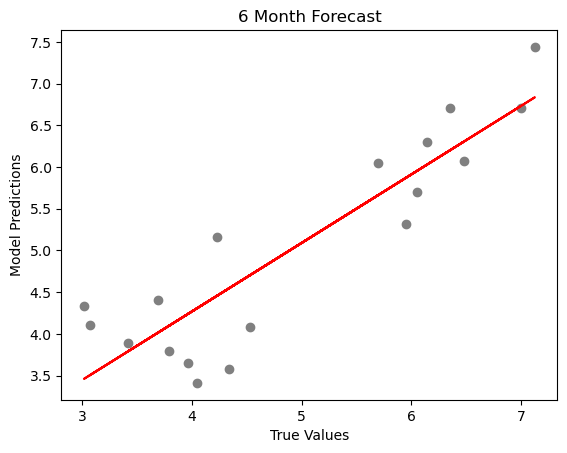

In [13]:
slope_m6, intercept_m6 = np.polyfit(y_test_m6, y_predict_m6, 1)
plt.scatter(y_test_m6, y_predict_m6, color = 'gray')
plt.plot(y_test_m6, slope_m6 * y_test_m6 + intercept_m6, color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('6 Month Forecast')

RMSE_m6 = float(format(np.sqrt(mean_squared_error(y_test_m6, y_predict_m6)), '.3f'))
MSE_m6 = mean_squared_error(y_test_m6, y_predict_m6)
MAE_m6 = mean_absolute_error(y_test_m6, y_predict_m6)
r2_m6 = r2_score(y_test_m6, y_predict_m6)
print('RSME = ', RMSE_m6)
print('MSE = ', MSE_m6)
print('MAE = ', MAE_m6)
print('R2 = ', r2_m6)

<h1> Evaluating 12 Month Regression Forecast

RSME =  0.516
MSE =  0.26660547217688185
MAE =  0.41719227494995376
R2 =  0.835292687663219


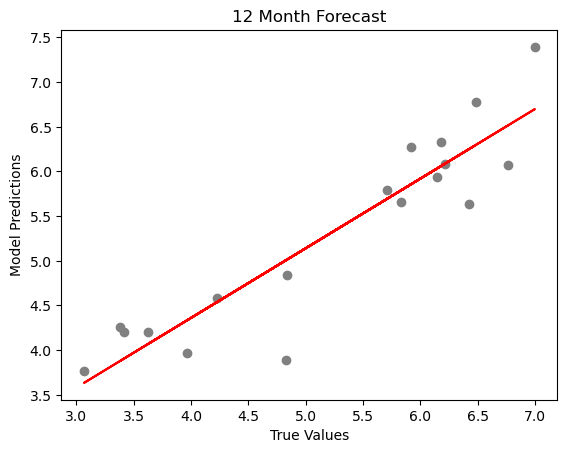

In [14]:
slope_m12, intercept_m12 = np.polyfit(y_test_m12, y_predict_m12, 1)
plt.scatter(y_test_m12, y_predict_m12, color = 'gray')
plt.plot(y_test_m12, slope_m12 * y_test_m12 + intercept_m12, color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('12 Month Forecast')

RMSE_m12 = float(format(np.sqrt(mean_squared_error(y_test_m12, y_predict_m12)), '.3f'))
MSE_m12 = mean_squared_error(y_test_m12, y_predict_m12)
MAE_m12 = mean_absolute_error(y_test_m12, y_predict_m12)
r2_m12 = r2_score(y_test_m12, y_predict_m12)
print('RSME = ', RMSE_m12)
print('MSE = ', MSE_m12)
print('MAE = ', MAE_m12)
print('R2 = ', r2_m12)

<h1> Preprocessing for Neural Networks

In [15]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_m12 = scaler.fit_transform(X_m12)
X_scaled_v2 = scaler.fit_transform(X2)

y_n_m3 = y_m3.values.reshape(-1,1)
y_n_m6 = y_m6.values.reshape(-1,1)
y_n_m12 = y_m12.values.reshape(-1,1)

y_scaled_m3 = scaler.fit_transform(y_n_m3)
y_scaled_m6 = scaler.fit_transform(y_n_m6)
y_scaled_m12 = scaler.fit_transform(y_n_m12)

Xn_train_m3, Xn_test_m3, yn_train_m3, yn_test_m3 = train_test_split(X_scaled, y_scaled_m3, test_size = 0.2, random_state=2023)
Xn_train_m3_v2, Xn_test_m3_v2, yn_train_m3_v2, yn_test_m3_v2 = train_test_split(X_scaled_v2, y_scaled_m3, test_size = 0.2, random_state=2023)
Xn_train_m6, Xn_test_m6, yn_train_m6, yn_test_m6 = train_test_split(X_scaled, y_scaled_m6, test_size = 0.2, random_state=2023)
Xn_train_m12, Xn_test_m12, yn_train_m12, yn_test_m12 = train_test_split(X_scaled_m12, y_scaled_m12, test_size = 0.2, random_state=2023)

<h1> Train Neural Networks

In [16]:
#Train 3 month forecast NN
model_m3 = Sequential()
model_m3.add(Dense(500, input_dim = 8, activation = 'relu'))
model_m3.add(Dense(500, activation='relu'))
model_m3.add(Dense(500, activation='relu'))

model_m3.add(Dense(1, activation='linear'))

model_m3.summary()
model_m3.compile(optimizer='Adam', loss ='mean_squared_error')
epochs_hist_m3 = model_m3.fit(Xn_train_m3,yn_train_m3, epochs=100, batch_size=50, validation_split=0.2)

epochs_hist_m3.history.keys()

#Train 3 month forecast NN with current mortgage rate as a predictor
model_m3_v2 = Sequential()
model_m3_v2.add(Dense(500, input_dim = 9, activation = 'relu'))
model_m3_v2.add(Dense(500, activation='relu'))
model_m3_v2.add(Dense(500, activation='relu'))

model_m3_v2.add(Dense(1, activation='linear'))

model_m3_v2.summary()
model_m3_v2.compile(optimizer='Adam', loss ='mean_squared_error')
epochs_hist_m3_v2 = model_m3_v2.fit(Xn_train_m3_v2,yn_train_m3_v2, epochs=100, batch_size=50, validation_split=0.2)

epochs_hist_m3_v2.history.keys()

#Train 6 month forecast NN
model_m6 = Sequential()
model_m6.add(Dense(500, input_dim = 8, activation = 'relu'))
model_m6.add(Dense(500, activation='relu'))
model_m6.add(Dense(500, activation='relu'))

model_m6.add(Dense(1, activation='linear'))

model_m6.summary()
model_m6.compile(optimizer='Adam', loss ='mean_squared_error')
epochs_hist_m6 = model_m6.fit(Xn_train_m6,yn_train_m6, epochs=100, batch_size=50, validation_split=0.2)

epochs_hist_m6.history.keys()

#Train 12 month forecast NN
model_m12 = Sequential()
model_m12.add(Dense(500, input_dim = 8, activation = 'relu'))
model_m12.add(Dense(500, activation='relu'))
model_m12.add(Dense(500, activation='relu'))

model_m12.add(Dense(1, activation='linear'))

model_m12.summary()
model_m12.compile(optimizer='Adam', loss ='mean_squared_error')
epochs_hist_m12 = model_m12.fit(Xn_train_m12,yn_train_m12, epochs=100, batch_size=50, validation_split=0.2)

epochs_hist_m12.history.keys()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               4500      
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 506,001
Trainable params: 506,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 2s 172ms/step - loss: 0.3255 - val_loss: 0.0443
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0658 - va

dict_keys(['loss', 'val_loss'])

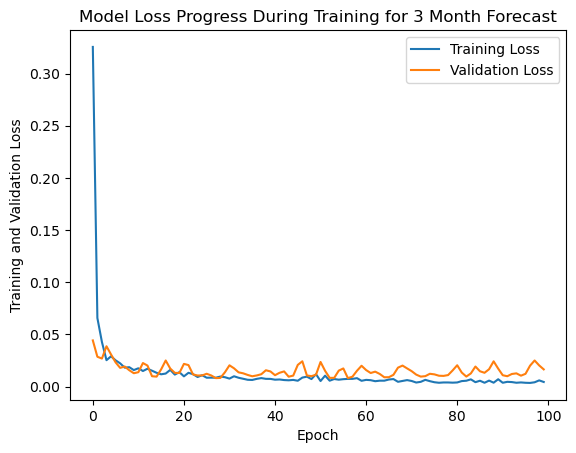

In [17]:
#3 month forecast model (Model Loss Progress)
plt.plot(epochs_hist_m3.history['loss'])
plt.plot(epochs_hist_m3.history['val_loss'])
plt.title('Model Loss Progress During Training for 3 Month Forecast')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])

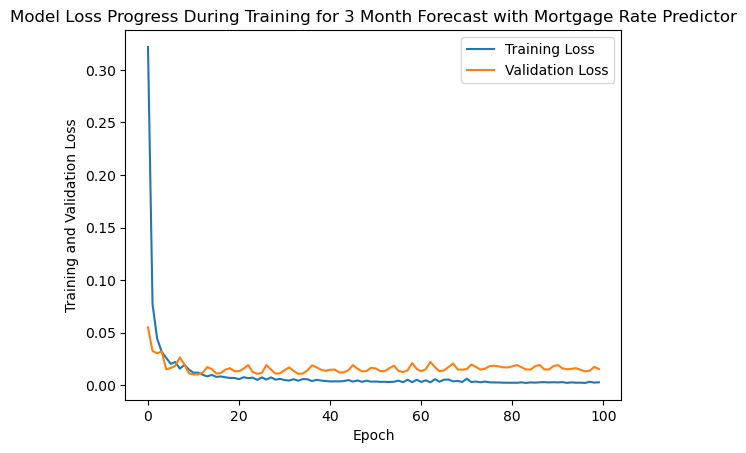

In [18]:
#3 month forecast model (Model Loss Progress) with current mortgage rate as a predictor
plt.plot(epochs_hist_m3_v2.history['loss'])
plt.plot(epochs_hist_m3_v2.history['val_loss'])
plt.title('Model Loss Progress During Training for 3 Month Forecast with Mortgage Rate Predictor')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])

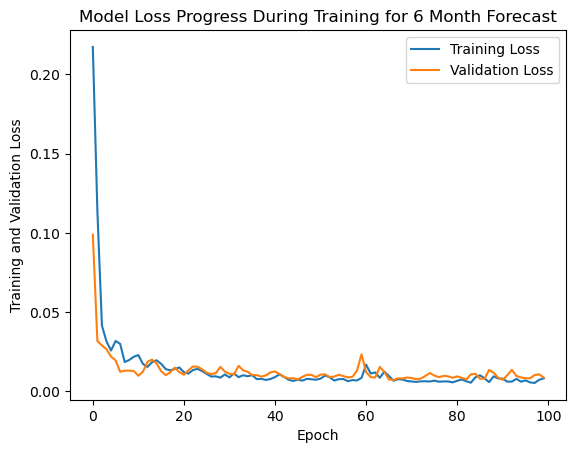

In [19]:
#6 month forecast model (Model Loss Progress)
plt.plot(epochs_hist_m6.history['loss'])
plt.plot(epochs_hist_m6.history['val_loss'])
plt.title('Model Loss Progress During Training for 6 Month Forecast')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])

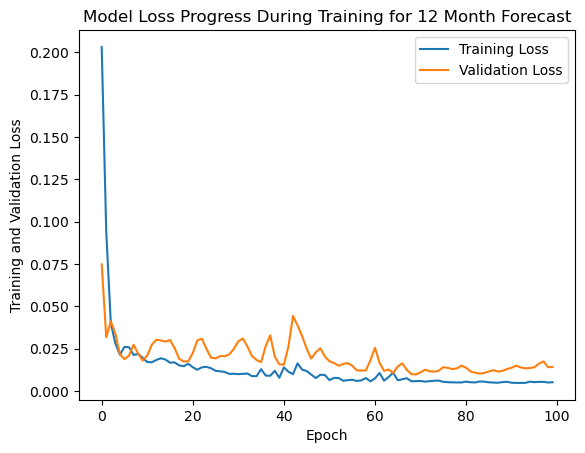

In [20]:
#12 month forecast model (Model Loss Progress)
plt.plot(epochs_hist_m12.history['loss'])
plt.plot(epochs_hist_m12.history['val_loss'])
plt.title('Model Loss Progress During Training for 12 Month Forecast')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])

<h1> Evaluate 3 Month Forecast Neural Network Model

1/1 [==============================] - 0s 122ms/step
RSME =  0.095
MSE =  0.009010582615798703
MAE =  0.08797544274823811
R2 =  0.9047390649439118


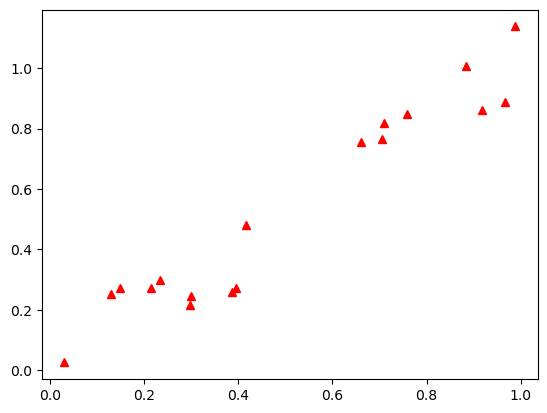

In [21]:
yn_predict_m3 = model_m3.predict(Xn_test_m3)
RMSE_nm3 = float(format(np.sqrt(mean_squared_error(yn_test_m3, yn_predict_m3)), '.3f'))
MSE_nm3 = mean_squared_error(yn_test_m3, yn_predict_m3)
MAE_nm3 = mean_absolute_error(yn_test_m3, yn_predict_m3)
r2_nm3 = r2_score(yn_test_m3, yn_predict_m3)
print('RSME = ', RMSE_nm3)
print('MSE = ', MSE_nm3)
print('MAE = ', MAE_nm3)
print('R2 = ', r2_nm3)
plt.plot(yn_test_m3, yn_predict_m3, "^", color='red')

<h1> Evaluate 3 Month Forecast Neural Network Model With Mortgage Rate Predictor

1/1 [==============================] - 0s 56ms/step
RSME =  0.067
MSE =  0.004469054017145024
MAE =  0.05964183048264757
R2 =  0.9527526373552189


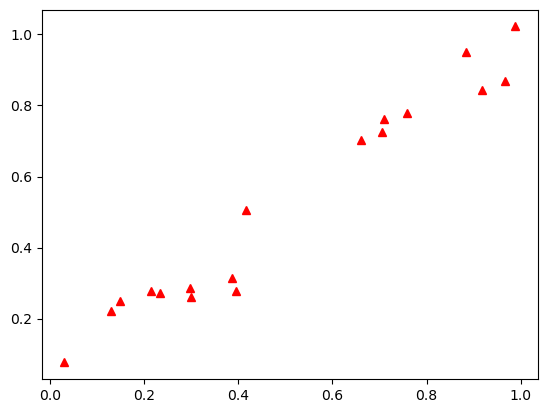

In [22]:
yn_predict_m3_v2 = model_m3_v2.predict(Xn_test_m3_v2)
RMSE_nm3_v2 = float(format(np.sqrt(mean_squared_error(yn_test_m3_v2, yn_predict_m3_v2)), '.3f'))
MSE_nm3_v2 = mean_squared_error(yn_test_m3_v2, yn_predict_m3_v2)
MAE_nm3_v2 = mean_absolute_error(yn_test_m3_v2, yn_predict_m3_v2)
r2_nm3_v2 = r2_score(yn_test_m3_v2, yn_predict_m3_v2)
print('RSME = ', RMSE_nm3_v2)
print('MSE = ', MSE_nm3_v2)
print('MAE = ', MAE_nm3_v2)
print('R2 = ', r2_nm3_v2)
plt.plot(yn_test_m3_v2, yn_predict_m3_v2, "^", color='red')

<h1> Evaluate 6 Month Forecast Neural Network Model

1/1 [==============================] - 0s 55ms/step
RSME =  0.104
MSE =  0.010796225917517074
MAE =  0.08613667272600181
R2 =  0.8642279744212681


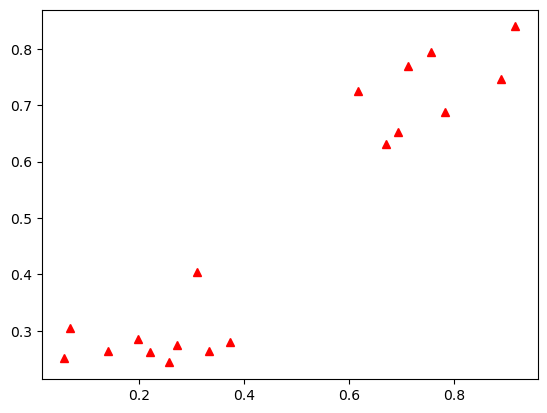

In [23]:
yn_predict_m6 = model_m6.predict(Xn_test_m6)
RMSE_nm6= float(format(np.sqrt(mean_squared_error(yn_test_m6, yn_predict_m6)), '.3f'))
MSE_nm6= mean_squared_error(yn_test_m6, yn_predict_m6)
MAE_nm6= mean_absolute_error(yn_test_m6, yn_predict_m6)
r2_nm6= r2_score(yn_test_m6, yn_predict_m6)
print('RSME = ', RMSE_nm6)
print('MSE = ', MSE_nm6)
print('MAE = ', MAE_nm6)
print('R2 = ', r2_nm6)
plt.plot(yn_test_m6, yn_predict_m6, "^", color='red')

<h1> Evaluate 12 Month Forecast Neural Network Model

1/1 [==============================] - 0s 53ms/step
RSME =  0.095
MSE =  0.009011155487651317
MAE =  0.07461922853976205
R2 =  0.8720024880453857


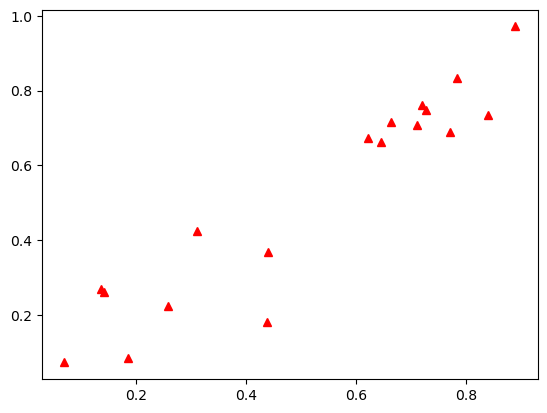

In [24]:
yn_predict_m12 = model_m12.predict(Xn_test_m12)
RMSE_nm12 = float(format(np.sqrt(mean_squared_error(yn_test_m12, yn_predict_m12)), '.3f'))
MSE_nm12 = mean_squared_error(yn_test_m12, yn_predict_m12)
MAE_nm12 = mean_absolute_error(yn_test_m12, yn_predict_m12)
r2_nm12 = r2_score(yn_test_m12, yn_predict_m12)
print('RSME = ', RMSE_nm12)
print('MSE = ', MSE_nm12)
print('MAE = ', MAE_nm12)
print('R2 = ', r2_nm12)
plt.plot(yn_test_m12, yn_predict_m12, "^", color='red')